<h2>1. Combining data files</h2>

In [1]:
import os
import pandas as pd


In [2]:
# Set the file directory path
directory = r'D:\Research\Python\Data\Archive\Complete Data Mined 2021-2022\Mined By Date\Month Interated'


In [3]:
# Initialize an empty list to store individual DataFrames
dataframes = []

In [4]:
# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_excel(file_path)
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Print the head of the combined DataFrame
combined_df.head(1)

,Datetime,Tweet Id,Text,Username
0,2021-01-31 23:49:48,1356026928793154048,Gov. Parson's budget funds Missouri Medicaid e...,OneNebulaHealth


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370364 entries, 0 to 4370363
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Tweet Id  int64         
 2   Text      object        
 3   Username  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 133.4+ MB


<h2>2. Handling duplicate tweets and Retweets</h2>

In [6]:
#count and print Duplicates based on "Tweet Id " column
print(combined_df.duplicated(subset=['Tweet Id']).sum())


#Removing Duplicates based on "Tweet Id " column
df= df.drop_duplicates(subset=['Tweet Id'], keep='first')


411410


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370364 entries, 0 to 4370363
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Tweet Id  int64         
 2   Text      object        
 3   Username  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 133.4+ MB


In [8]:
#create a new Column 'Is_Retweet' and mark retweets
df['Is_Retweet'] = df['Text'].apply(lambda x: x[:2]=='RT')

#count the number of retweets
df['Is_Retweet'].value_counts()



Is_Retweet
False    11959
True        19
Name: count, dtype: int64

In [9]:
#filter out retweets
df = df[df['Is_Retweet']==False]

#drop row if df['Is_Retweet']==True
df.drop(df[df['Is_Retweet']==True].index, inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370364 entries, 0 to 4370363
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Tweet Id  int64         
 2   Text      object        
 3   Username  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 133.4+ MB


In [10]:
# Save the combined DataFrame as a pickle file
pickle_path = os.path.join(directory, 'combined.pickle')
combined_df.to_pickle(pickle_path)


print("Combined DataFrame saved as 'combined.pickle'")

Combined DataFrame saved as 'combined.pickle'


<h2>3. Exploratory Data Analysis</h2>

<h3>3.1. Overview of the dataset</h3>

In [11]:
import os
import pandas as pd

# Set the file directory path
directory = r'D:\Research\Python\Data\Archive\Complete Data Mined 2021-2022'
pickle_path = os.path.join(directory, 'combined.pickle')

#load the picke to df
df = pd.read_pickle(pickle_path)

In [12]:
# Display the first few rows of the dataset
df.head()

,Datetime,Tweet Id,Text,Username
0,2021-01-31 23:49:48,1356026928793154048,Gov. Parson's budget funds Missouri Medicaid e...,OneNebulaHealth
1,2021-01-31 23:00:00,1356014397131546880,Global #Obesity #Treatment #Surgery Devices Ma...,Bariquins
2,2021-01-31 22:56:56,1356013627543793920,Parents get re-LEAF knowing that with #Medicai...,healthykidsks
3,2021-01-31 22:48:17,1356011449131429888,And we are excited to get to work! \n\nOur nex...,CollettPSmall
4,2021-01-31 22:34:08,1356007889660334080,“The federal government has responded to the C...,bjudy90


In [13]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370364 entries, 0 to 4370363
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Tweet Id  int64         
 2   Text      object        
 3   Username  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 133.4+ MB


<h3>3.2 Univariate Analysis:</h3>

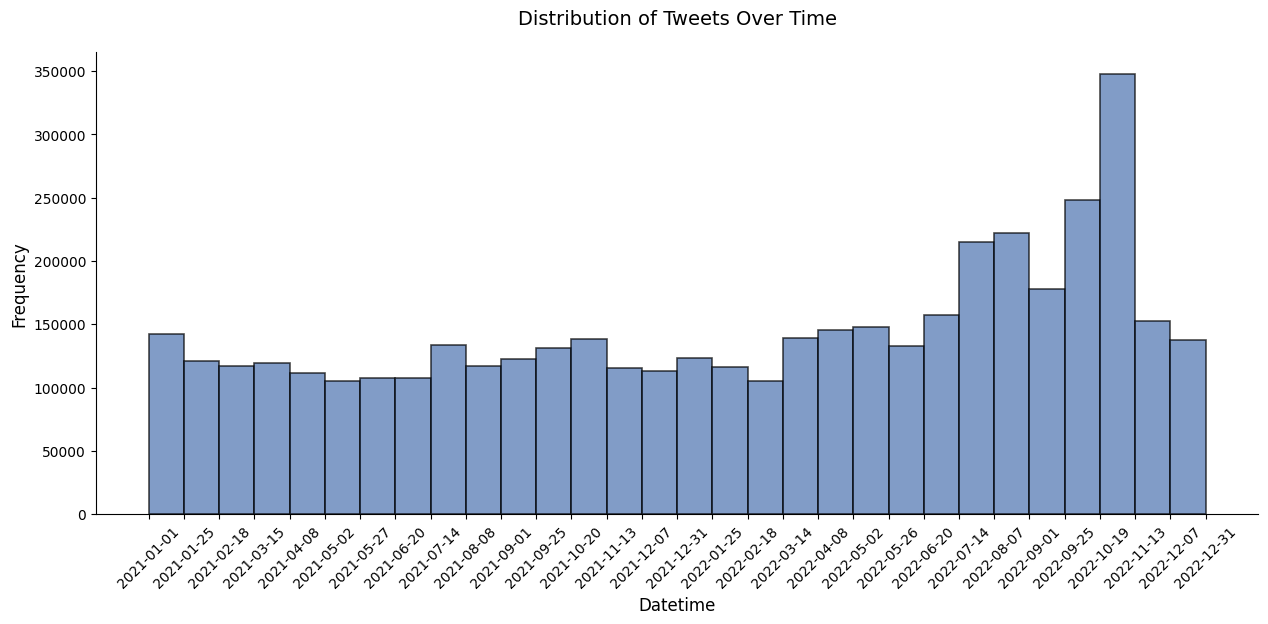

In [14]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 6))

# Calculate the frequency of each Datetime
hist, bins, _ = plt.hist(df['Datetime'], bins=30, alpha=0.7, edgecolor='black', linewidth=1.2, color='#4C72B0')

# Set the x-axis and y-axis labels
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set the title and adjust the position
plt.title('Distribution of Tweets Over Time', fontsize=14, pad=20)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick label size
plt.xticks(bins, fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


<h3>3.3 Bivariate Analysis:</h3>

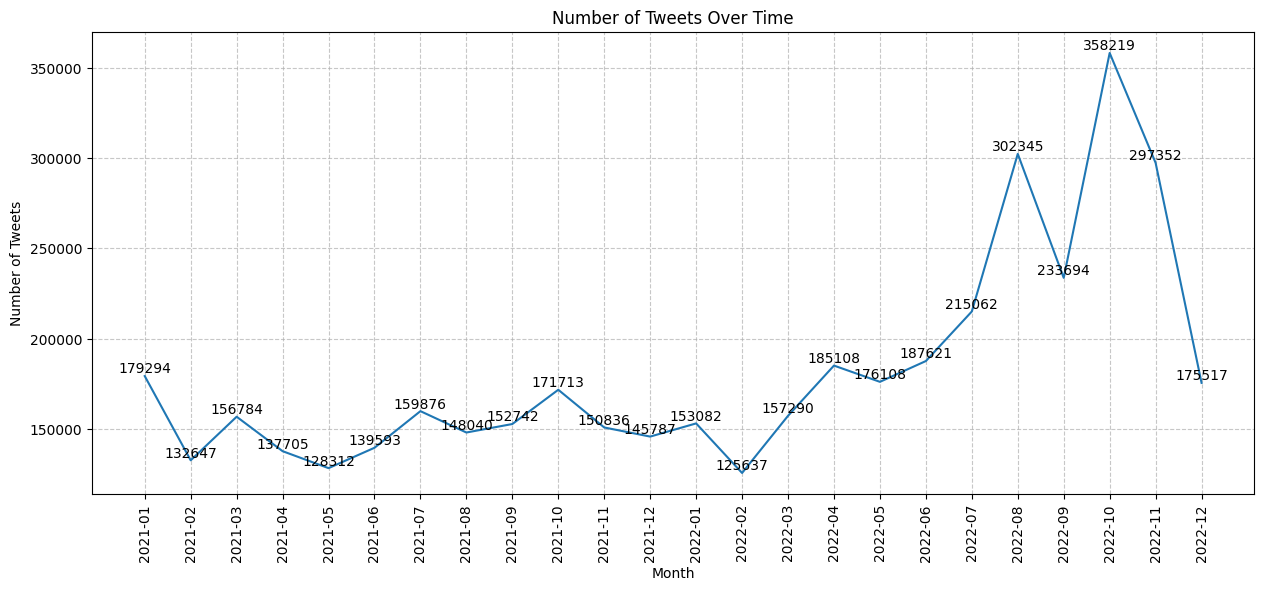

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size
plt.figure(figsize=(15, 6))

# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the 'Date' component from the 'Datetime' column
df['Date'] = df['Datetime'].dt.to_period('M')

# Count the number of tweets for each month
tweets_by_month = df['Date'].value_counts().sort_index()

# Convert Period objects to strings
tweets_by_month.index = tweets_by_month.index.astype(str)

# Plot the number of tweets over time
plt.plot(tweets_by_month.index, tweets_by_month.values)

# Set the x-axis and y-axis labels
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)



# Add text annotations for each data point
for x, y in zip(tweets_by_month.index, tweets_by_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Add grey lines at tick marks
ax = plt.gca()
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [16]:
# List of keywords to check
keywords = ['Us Healthcare', '#Ushealthcare', 'Medicaid', 'Medicare', 'tricare', 'veterans care', '#Medicaid', '#Medicare', '#tricare', '#veterans care']

# Create a new column named "Keywords" and initialize it as an empty string
df['Keywords'] = ''

# Convert NaN values in the "Text" column to empty strings
df['Text'] = df['Text'].fillna('')

# Loop through each keyword and check if it exists in any row of the "Text" column
for keyword in keywords:
    mask = df['Text'].str.contains(keyword, case=False, na=False)
    df.loc[mask, 'Keywords'] += keyword + ', ' # Include comma between keywords

# Strip any leading/trailing whitespace and comma in the "Keywords" column
df['Keywords'] = df['Keywords'].str.rstrip(',')


In [17]:
# Save the combined DataFrame as a pickle file
pickle_path = os.path.join(directory, 'combinedWithKeywords.pickle')
df.to_pickle(pickle_path)


print("DataFrame saved as 'combinedWithKeywords.pickle'")

DataFrame saved as 'combinedWithKeywords.pickle'


In [18]:
import os
import pandas as pd
# Set the file directory path
directory = r'D:\Research\Python\Data\Archive\Complete Data Mined 2021-2022'
pickle_path = os.path.join(directory, 'combinedWithKeywords.pickle')

#load the picke to df
df = pd.read_pickle(pickle_path)

In [19]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370364 entries, 0 to 4370363
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Tweet Id  int64         
 2   Text      object        
 3   Username  object        
 4   Date      period[M]     
 5   Keywords  object        
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 200.1+ MB


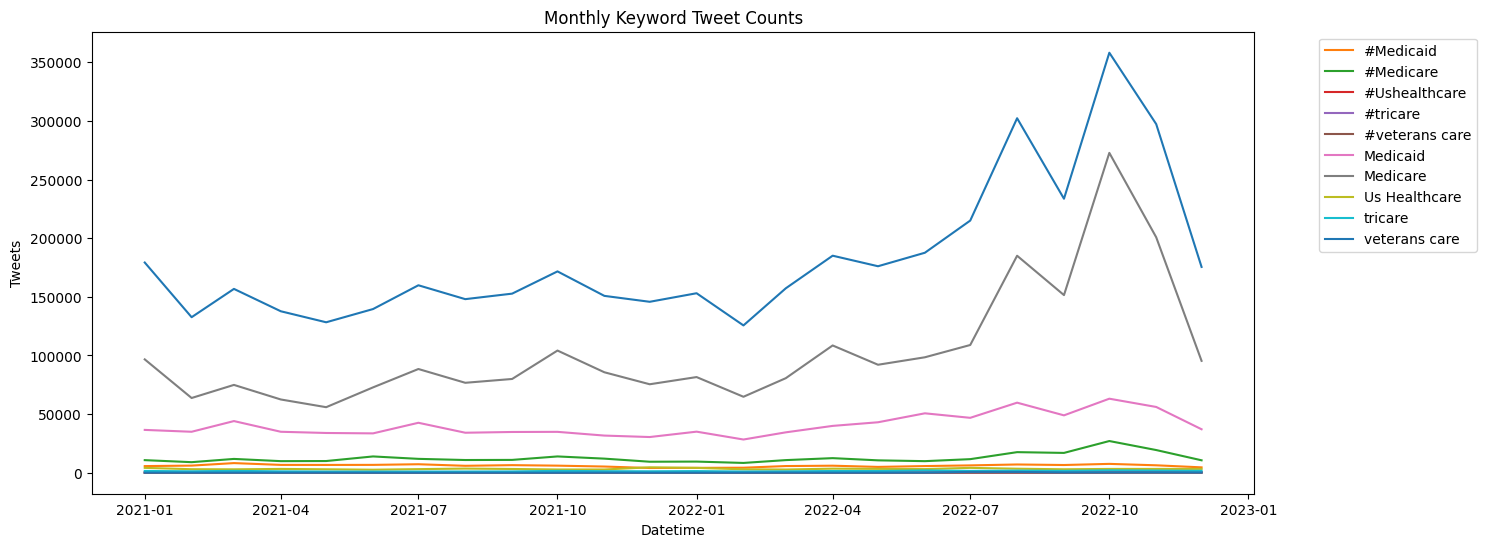

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Preprocess the "Keywords" column
df['Keywords'] = df['Keywords'].str.split(', ')

# Step 2: Group the data by "Datetime" and individual keywords
grouped_df = df.explode('Keywords').groupby(['Datetime', 'Keywords'])

# Step 3: Count the occurrences of each keyword for each date
count_df = grouped_df.size().reset_index(name='Count')

# Step 4: Aggregate monthly
count_df['Datetime'] = count_df['Datetime'].dt.to_period('M')
monthly_counts = count_df.groupby(['Datetime', 'Keywords'])['Count'].sum().reset_index()

# Convert "Datetime" column back to datetime format
monthly_counts['Datetime'] = monthly_counts['Datetime'].dt.to_timestamp()

# Step 5: Plot the line graph
fig, ax = plt.subplots(figsize=(15, 6))

# Iterate over each unique keyword
for keyword in monthly_counts['Keywords'].unique():
    keyword_data = monthly_counts[monthly_counts['Keywords'] == keyword]
    ax.plot(keyword_data['Datetime'], keyword_data['Count'], label=keyword)

ax.set_xlabel('Datetime')
ax.set_ylabel('Tweets')
ax.set_title('Monthly Keyword Tweet Counts')

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


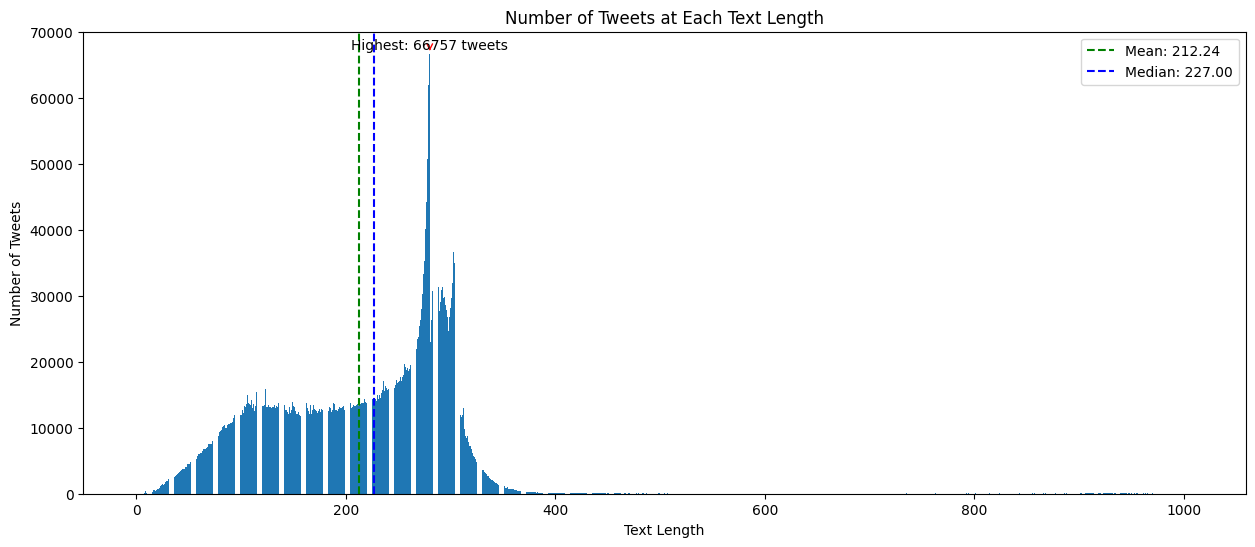

Mean : 212.24
Median: 227.00
Most prominant length: 280


In [21]:
import matplotlib.pyplot as plt

text_lengths = df['Text'].apply(len)
text_length_counts = text_lengths.value_counts()

plt.figure(figsize=(15, 6))  # Set the figure size

plt.bar(text_length_counts.index, text_length_counts.values)
plt.xlabel('Text Length')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets at Each Text Length')

# Highlight the highest number of tweets
max_count = text_length_counts.max()
max_length = text_length_counts.idxmax()
plt.annotate(f'Highest: {max_count} tweets', xy=(max_length, max_count),
             xytext=(max_length, max_count + 200),
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='->', color='red'))

# Add mean and median annotations
mean_length = text_lengths.mean()
median_length = text_lengths.median()
plt.axvline(mean_length, color='green', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='blue', linestyle='--', label=f'Median: {median_length:.2f}')
plt.legend()

# Get the tick positions and labels
ticks = plt.xticks()[0]

plt.show()

# Print mean, median, and length of the highest number of tweets
print(f"Mean : {mean_length:.2f}")
print(f"Median: {median_length:.2f}")
print(f"Most prominant length: {max_length}")


<h3>3.3 Additinal Visualizations</h3>

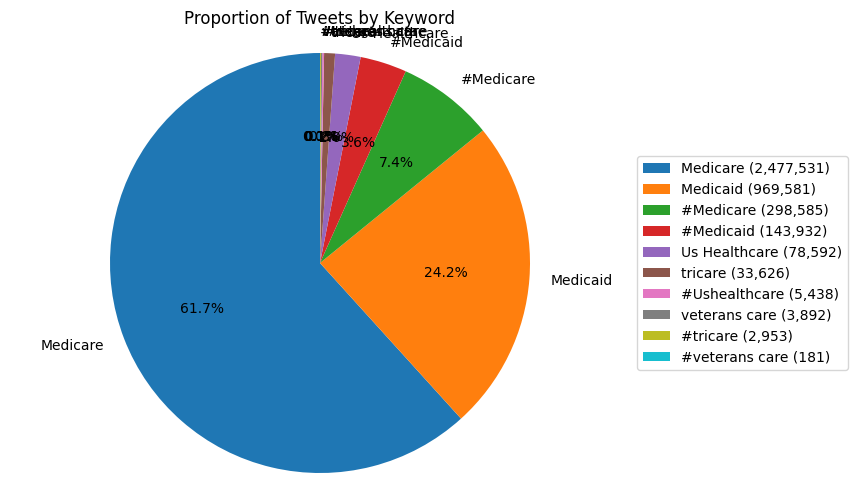

Medicare (2,477,531)
Medicaid (969,581)
#Medicare (298,585)
#Medicaid (143,932)
Us Healthcare (78,592)
tricare (33,626)
#Ushealthcare (5,438)
veterans care (3,892)
#tricare (2,953)
#veterans care (181)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the DataFrame from pickle file
df = pd.read_pickle(pickle_path)

# Step 1: Split the keywords into separate rows
df['Keywords'] = df['Keywords'].str.split(', ')

# Step 2: Explode the DataFrame to create separate rows for each keyword
df_exploded = df.explode('Keywords')

# Step 3: Remove null (empty) keywords from the dataset
df_exploded = df_exploded[df_exploded['Keywords'] != ""]

# Step 4: Count the number of tweets per keyword
keyword_counts = df_exploded['Keywords'].value_counts()

# Step 5: Plotting the pie chart with keywords in a legend
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the pie chart with labels at varying distances from the center
patches, _, _ = ax.pie(keyword_counts, labels=keyword_counts.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)

# Create a legend with the keywords and proportions
legend_labels = [f'{label} ({count:,})' for label, count in zip(keyword_counts.index, keyword_counts.values)]
ax.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Set aspect ratio to ensure that pie is drawn as a circle
ax.axis('equal')

# Set title for the plot
ax.set_title('Proportion of Tweets by Keyword')

# Show the plot
plt.show()

# Print the legend without colors on the console
for label in legend_labels:
    print(label)


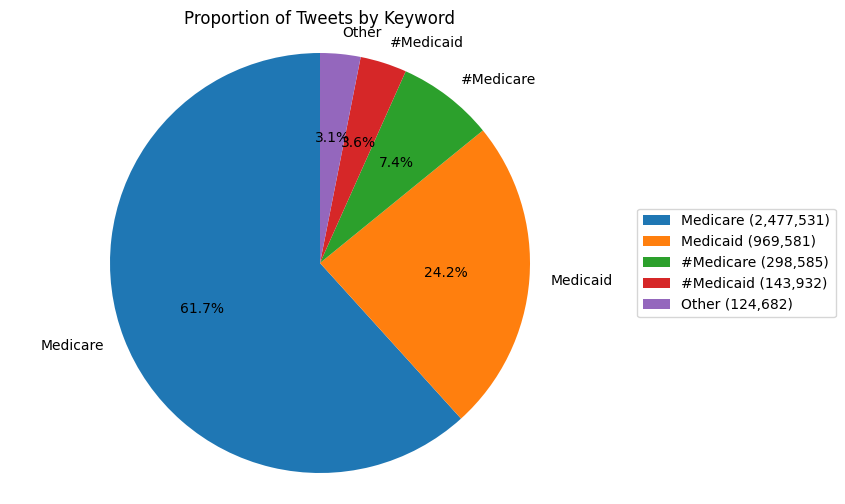

Medicare (2,477,531)
Medicaid (969,581)
#Medicare (298,585)
#Medicaid (143,932)
Other (124,682)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the DataFrame from pickle
df = pd.read_pickle(pickle_path)

# Step 1: Split the keywords into separate rows
df['Keywords'] = df['Keywords'].str.split(', ')

# Step 2: Explode the DataFrame to create separate rows for each keyword
df_exploded = df.explode('Keywords')

# Step 3: Remove null (empty) keywords from the dataset
df_exploded = df_exploded[df_exploded['Keywords'] != ""]

# Step 4: Count the number of tweets per keyword
keyword_counts = df_exploded['Keywords'].value_counts()

# Step 5: Keep the top 7 largest keywords and aggregate the rest as "Other"
top_keywords = keyword_counts.head(4)
other_count = keyword_counts[4:].sum()
top_keywords['Other'] = other_count

# Step 6: Plotting the pie chart with keywords in a legend
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the pie chart with labels at varying distances from the center
patches, _, _ = ax.pie(top_keywords, labels=top_keywords.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)

# Create a legend with the keywords and proportions
legend_labels = [f'{label} ({count:,})' for label, count in zip(top_keywords.index, top_keywords.values)]
ax.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Set aspect ratio to ensure that pie is drawn as a circle
ax.axis('equal')

# Set title for the plot
ax.set_title('Proportion of Tweets by Keyword')

# Show the plot
plt.show()

# Print the legend without colors on the console
for label in legend_labels:
    print(label)
